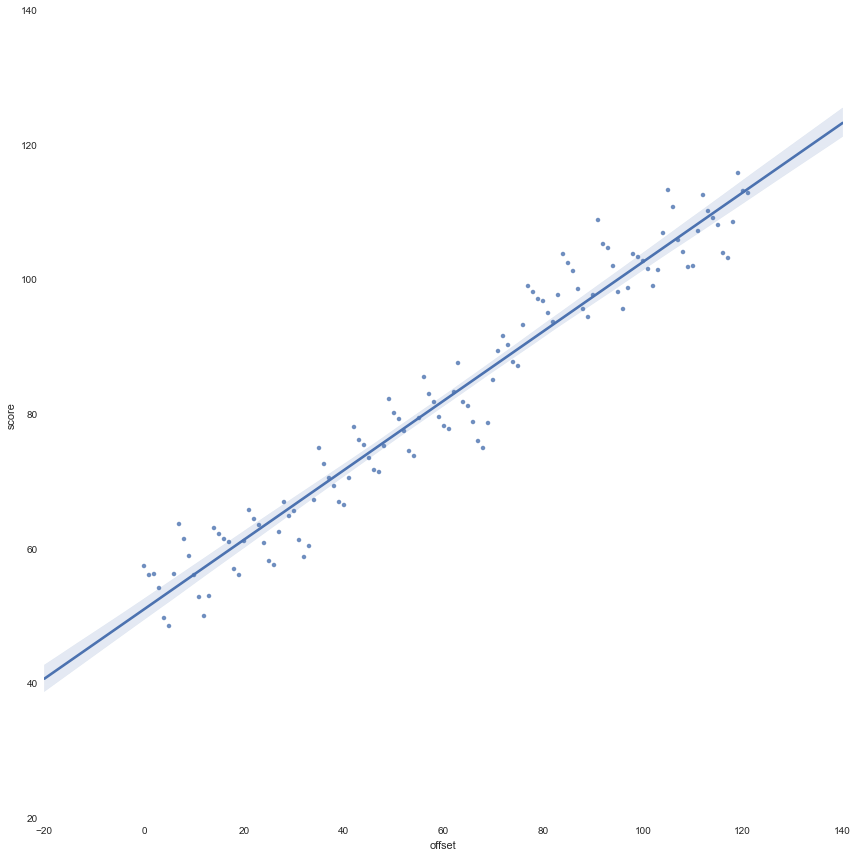

In [9]:
from sklearn import linear_model
import seaborn as sns
import sklearn
import pandas as pd
from datetime import date, datetime, timedelta


%matplotlib inline

text = """6/2/2014	57.511823
6/3/2014	56.151972
6/4/2014	56.351107
6/5/2014	54.307519
6/6/2014	49.786316
6/7/2014	48.639637
6/8/2014	56.329657
6/9/2014	63.723264
6/10/2014	61.584772
6/11/2014	58.969308
6/12/2014	56.251034
6/13/2014	52.951157
6/14/2014	50.064447
6/15/2014	53.133898
6/16/2014	63.161202
6/17/2014	62.353978
6/18/2014	61.605109
6/19/2014	61.122182
6/20/2014	57.070161
6/21/2014	56.166922
6/22/2014	61.244541
6/23/2014	65.794863
6/24/2014	64.498361
6/25/2014	63.603642
6/26/2014	60.935967
6/27/2014	58.332175
6/28/2014	57.723656
6/29/2014	62.664843
6/30/2014	67.097488
7/1/2014	64.978105
7/2/2014	65.744311
7/3/2014	61.381364
7/4/2014	58.843324
7/5/2014	60.576798
7/6/2014	67.397009
7/7/2014	75.116799
7/8/2014	72.70029
7/9/2014	70.589551
7/10/2014	69.393008
7/11/2014	67.050185
7/12/2014	66.606584
7/13/2014	70.581593
7/14/2014	78.189438
7/15/2014	76.295759
7/16/2014	75.539044
7/17/2014	73.536228
7/18/2014	71.77136
7/19/2014	71.5787
7/20/2014	75.327433
7/21/2014	82.39223
7/22/2014	80.254894
7/23/2014	79.35238
7/24/2014	77.579777
7/25/2014	74.701207
7/26/2014	73.909262
7/27/2014	79.469792
7/28/2014	85.660667
7/29/2014	83.079466
7/30/2014	81.894134
7/31/2014	79.727072
8/1/2014	78.416918
8/2/2014	77.892177
8/3/2014	83.342947
8/4/2014	87.648846
8/5/2014	81.909318
8/6/2014	81.261653
8/7/2014	78.919679
8/8/2014	76.098207
8/9/2014	75.016414
8/10/2014	78.754946
8/11/2014	85.121195
8/12/2014	89.417825
8/13/2014	91.70377
8/14/2014	90.433842
8/15/2014	87.902478
8/16/2014	87.247008
8/17/2014	93.342204
8/18/2014	99.160179
8/19/2014	98.24376
8/20/2014	97.206651
8/21/2014	96.963
8/22/2014	95.190404
8/23/2014	93.812093
8/24/2014	97.804758
8/25/2014	103.93944
8/26/2014	102.528303
8/27/2014	101.320336
8/28/2014	98.758601
8/29/2014	95.722877
8/30/2014	94.508656
8/31/2014	97.758234
9/1/2014	108.981031
9/2/2014	105.414795
9/3/2014	104.785559
9/4/2014	102.172124
9/5/2014	98.182475
9/6/2014	95.719603
9/7/2014	98.775702
9/8/2014	103.877411
9/9/2014	103.380422
9/10/2014	102.783421
9/11/2014	101.688656
9/12/2014	99.17346
9/13/2014	101.481861
9/14/2014	107.006589
9/15/2014	113.432592
9/16/2014	110.820316
9/17/2014	105.911031
9/18/2014	104.241335
9/19/2014	101.906055
9/20/2014	102.106704
9/21/2014	107.282933
9/22/2014	112.707074
9/23/2014	110.32483
9/24/2014	109.197209
9/25/2014	108.14395
9/26/2014	104.106736
9/27/2014	103.268973
9/28/2014	108.667989
9/29/2014	115.883396
9/30/2014	113.276999
10/1/2014	112.969461"""

lines = [line for line in text.split("\n") if not ""]
data = [row.split("\t") for row in lines]

# ts = pd.Series(data, columns=['date', 'score'])
data = pd.DataFrame(data, columns=['date', 'score'])

# data['date'] = pd.to_datetime(data['date'])

# data.describe().T
# ts['score'].hist()

data['offset'] = data.index
data['score'] = data['score'].map(lambda score: float(score))

sns.lmplot("offset", "score", data, size=12, robust=True, n_boot=500)


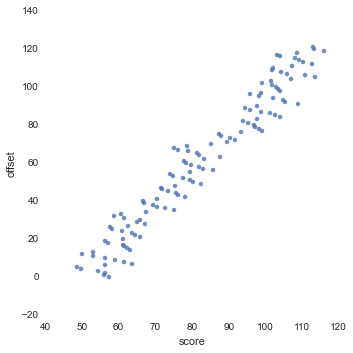

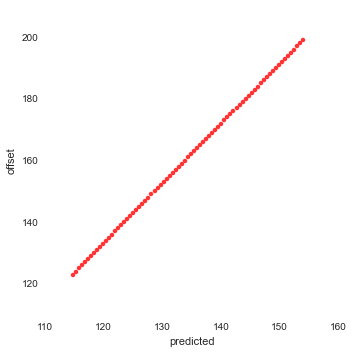

In [50]:

lm = linear_model.LinearRegression(fit_intercept=True)

# forget how to transform object to this dimensionality.. so annoying hehe
to_predict = [[val] for val in range(123, 200)]
to_fit_X = [[val] for val in data['offset'].values]

lm.fit(to_fit_X, data['score'].values)

# print to_predict, test data exists.. looks kinda good.
lm.predict(to_predict)

y_hat = pd.DataFrame(lm.predict(to_predict), columns=['predicted'])
y_hat['offset'] = range(123, 200) # 123 = oct 2nd, 124 = oct 3rd, 125 = oct 4th, etc

sns.set_context(rc={"figure.figsize": (25, 25)})

# original data
sns.lmplot("score", "offset", data=data[['score', 'offset']], fit_reg=False)

# predicted 2nd plot
sns.lmplot("predicted", "offset", data=y_hat, fit_reg=False, color="red")


In [49]:
# could munge some of the offsets this way to assign dates / get lookup for date prediction data
dates = pd.date_range('10/2/14', '12/1/14')
dates_formatted = []
for date in dates:
    dates_formatted.append(date.strftime('%m-%d-%y'))
    
zip(dates_formatted, range(123, len(dates_formatted) + 123))



[('10-02-14', 123),
 ('10-03-14', 124),
 ('10-04-14', 125),
 ('10-05-14', 126),
 ('10-06-14', 127),
 ('10-07-14', 128),
 ('10-08-14', 129),
 ('10-09-14', 130),
 ('10-10-14', 131),
 ('10-11-14', 132),
 ('10-12-14', 133),
 ('10-13-14', 134),
 ('10-14-14', 135),
 ('10-15-14', 136),
 ('10-16-14', 137),
 ('10-17-14', 138),
 ('10-18-14', 139),
 ('10-19-14', 140),
 ('10-20-14', 141),
 ('10-21-14', 142),
 ('10-22-14', 143),
 ('10-23-14', 144),
 ('10-24-14', 145),
 ('10-25-14', 146),
 ('10-26-14', 147),
 ('10-27-14', 148),
 ('10-28-14', 149),
 ('10-29-14', 150),
 ('10-30-14', 151),
 ('10-31-14', 152),
 ('11-01-14', 153),
 ('11-02-14', 154),
 ('11-03-14', 155),
 ('11-04-14', 156),
 ('11-05-14', 157),
 ('11-06-14', 158),
 ('11-07-14', 159),
 ('11-08-14', 160),
 ('11-09-14', 161),
 ('11-10-14', 162),
 ('11-11-14', 163),
 ('11-12-14', 164),
 ('11-13-14', 165),
 ('11-14-14', 166),
 ('11-15-14', 167),
 ('11-16-14', 168),
 ('11-17-14', 169),
 ('11-18-14', 170),
 ('11-19-14', 171),
 ('11-20-14', 172),
